# Non-periodic signals
As we saw in the [Spectral Leakage notebook](./leakage.ipynb), if we do not have a periodic signal, the amplitude of the FFT is smeared out over a range of frequencies.
A similar feature happens for non-periodic signals. Consider the following signal
$$
x(t)=\begin{cases}
\sin(8\pi t)&& \text{if } t<T_s\\
\sin(24\pi t)&& \text{if } t>=T_s
\end{cases}
$$
where $T_s=2$ in the following snippet.

Text(0, 0.5, 'x')

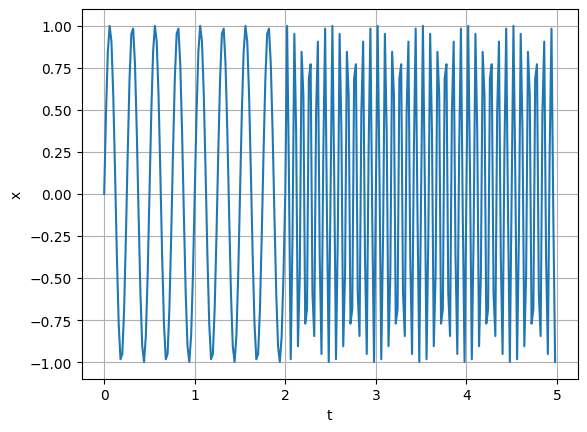

In [1]:
import numpy as np
import matplotlib.pyplot as plt
T = 5
sample_frequency = 50
t = np.linspace(0,T, int(sample_frequency*T), endpoint=False)

def x(t, time_varying:bool=True, T_s:float=2):
    if time_varying:
        return (t<T_s)*np.sin(8*np.pi*t) + (t>T_s)*np.sin(24*np.pi*t)
    else:
        return np.sin(8*np.pi*t) + np.sin(24*np.pi*t)
signal = x(t, True)
_ = plt.plot(t, signal)
ax = plt.gca()
ax.grid()
ax.set_xlabel("t")
ax.set_ylabel("x")

We compute the DFT of the signal and obtain

Text(0, 0.5, 'Coefficient Amplitude')

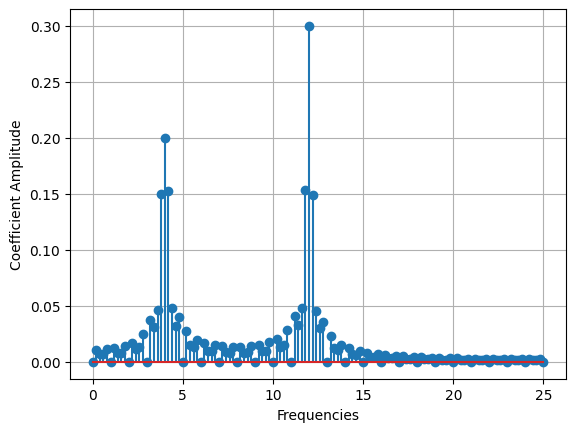

In [6]:
rfft = np.fft.rfft(signal)
rfrequencies = np.fft.rfftfreq(len(signal), d=1./sample_frequency)
fig = plt.figure()
ax = plt.gca()
_ = ax.stem(rfrequencies, np.abs(rfft)/len(signal))
ax.grid()
ax.set_xlabel("Frequencies")
ax.set_ylabel("Coefficient Amplitude")

We observe that there is a lot of pollution in the frequency specter.

A way to handle this with Fourier analysis, is by using the Short Time Fourier Transform (STFT).
This means that we split the signal into a set of sub-signals, using windowing, and compute the FFT for each of the new signals.
It is common to let the windows have a slight overlap, to try to capture as much information as possible

In [8]:
import scipy.signal
from ipywidgets import interact, widgets
ws = {'description_width': 'initial'}
@widgets.interact(
    samples_per_window = widgets.IntSlider(24, min=24, max=len(signal), description="Samples per window",style=ws),
    window=widgets.Select(options=['hann', 'hamming','boxcar'], value='boxcar',
                           description='Windowing function:',
                           disabled=False, style=ws))
def FFT(samples_per_window:int, window:str):
    f, t, Zxx = scipy.signal.stft(signal, fs=sample_frequency, window=window,
                                  nperseg=samples_per_window, padded=False)
    plt.pcolormesh(t, f, np.abs(Zxx), vmin=0, vmax=max(signal)/2)
    plt.colorbar()
    plt.title('STFT Magnitude')
    plt.ylabel('Frequency [Hz]')
    plt.xlabel('Time [sec]')

interactive(children=(IntSlider(value=24, description='Samples per window', max=250, min=24, style=SliderStyle…

We can also do this with another library, [librosa](https://librosa.org/doc/main/index.html).

In [10]:
import librosa, librosa.display
@widgets.interact(
    samples_per_window = widgets.IntSlider(24, min=24, max=len(signal), description="Samples per window",style=ws),
    window=widgets.Select(options=['hann', 'hamming','boxcar'], value='hann',
                           description='Windowing function:',
                           disabled=False, style=ws))
def FFT(samples_per_window:int, window:str):
    D = librosa.stft(signal, n_fft=samples_per_window, window=window)

    fig, ax = plt.subplots()

    ax.set_title('STFT')
    img = librosa.display.specshow(D,sr=sample_frequency, y_axis="fft", ax=ax)
    fig.colorbar(img, ax=ax)


interactive(children=(IntSlider(value=24, description='Samples per window', max=250, min=24, style=SliderStyle…

# Exercise
1. What happens to the STFT if we increase the number of windows?
2. Create a function that returns the STFT with $T_s$ as input.